## Table of contents:
* Competition and data overview
* Setting Up ( data and packages )
* Basic exploration/EDA
* Modeling 
    * Stationarity
    * Seasonality , Trend and Remainder
    * AR , MA , ARMA , ARIMA
    * Selecting P and Q using AIC
    * ETS
    * Prophet 
    * UCM
    
    
## Competition and data overview:

In this playground competition, we are provided with the challenge of predicting total sales for every product and store in the next month for Russian Software company-[1c company](http://1c.ru/eng/title.htm).

**What does the 1C company do?:**

1C: Enterprise 8 system of programs is intended for automation of everyday enterprise activities: various business tasks of economic and management activity, such as management accounting, business accounting, HR management, CRM, SRM, MRP, MRP, etc.

**Data**:
We are provided with daily sales data for each store-item combination, but our task is to predict sales at a monthly level.


## Visão geral dos Dados e da Competição:

Nesta competição, nosso objetivo é prever o total de vendas um mês a frente, de cada produto para cada loja de uma companhia de Software russa-[1c company](http://1c.ru/eng/title.htm).

**O que a Companhia 1C faz:**

1C: o sistema de programas Enterprise 8 destina-se à automação das atividades empresariais diárias: várias tarefas comerciais de atividades econômicas e de gerenciamento, como contabilidade gerencial, contabilidade comercial, gerenciamento de RH, CRM, SRM, MRP, MRP, etc.

**Dados:**
Nos é fornecido o registro de vendas diário para o par (loja, item), mas nossa tarefa é predizer as vendas a nível mensal.

## Setting Up

In [24]:
# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
import zipfile as zf # handle zip files

# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots


# TIME SERIES
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf, arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


# settings
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15,7]
plt.rcParams['font.size'] = 15




In [46]:
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from sklearn.metrics import r2_score

### Leitura

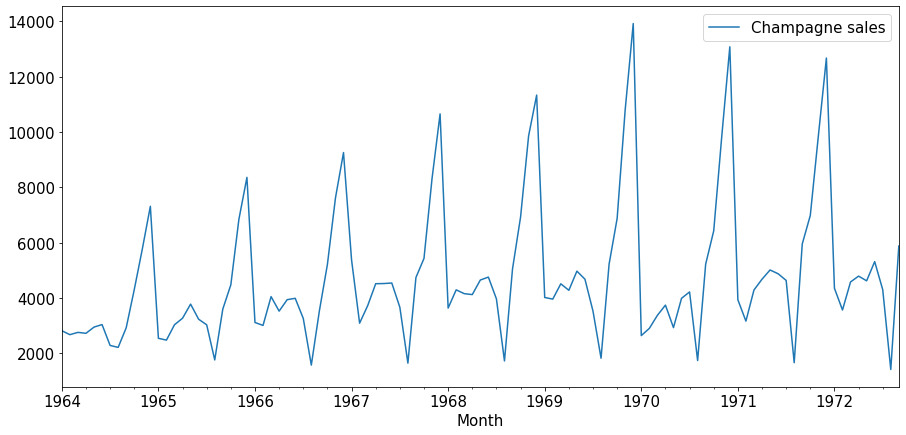

In [23]:
sales_data = pd.read_csv("competitive-data-science-predict-future-sales/Champagne Sales.csv", parse_dates=["Month"], index_col="Month")


sales_data.plot();

In [49]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(sales_data)

(0.01, False)

### Modelo

In [16]:
#Spliting the dataset into train and test
train = sales_data[:85]
test = sales_data[-20:]

In [17]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1203.853, Time=0.23 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1192.025, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1176.246, Time=0.71 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1174.731, Time=0.21 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1176.034, Time=0.53 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1176.700, Time=1.14 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1175.054, Time=0.37 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1174.769, Time=0.40 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1194.721, Time=0.11 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1174.564, Time=1.11 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=1.73 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=1.73 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1176.707, Time=3.03 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1176.127, Time=0.80 sec
 ARIMA(1,1,3)(0,1,0)[12]     

In [19]:
print(arima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(1, 1, 2)x(0, 1, [], 12)   Log Likelihood                -583.282
Date:                             Thu, 08 Dec 2022   AIC                           1174.564
Time:                                     18:02:09   BIC                           1183.670
Sample:                                 01-01-1964   HQIC                          1178.189
                                      - 01-01-1971                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8412      0.152     -5.544      0.000      -1.139      -0.544
ma.L1          0.0513      

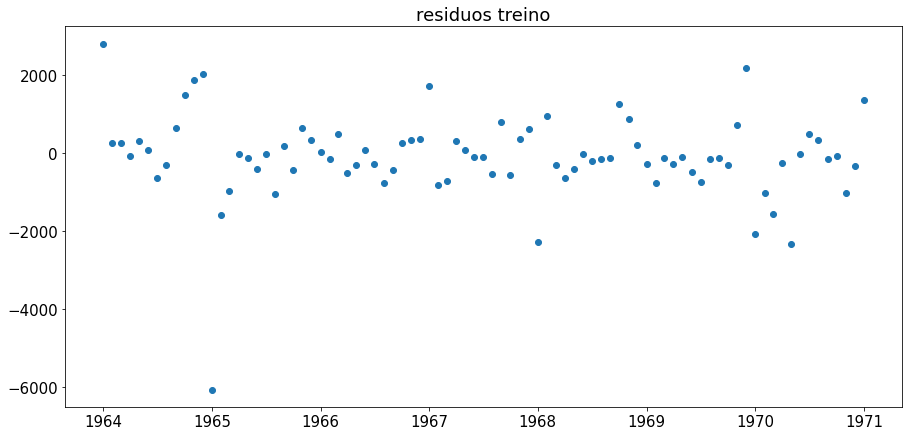

In [41]:
residuos = arima_model.resid()

plt.scatter(x=residuos.index, y=residuos)
plt.title("residuos treino");

### Predição

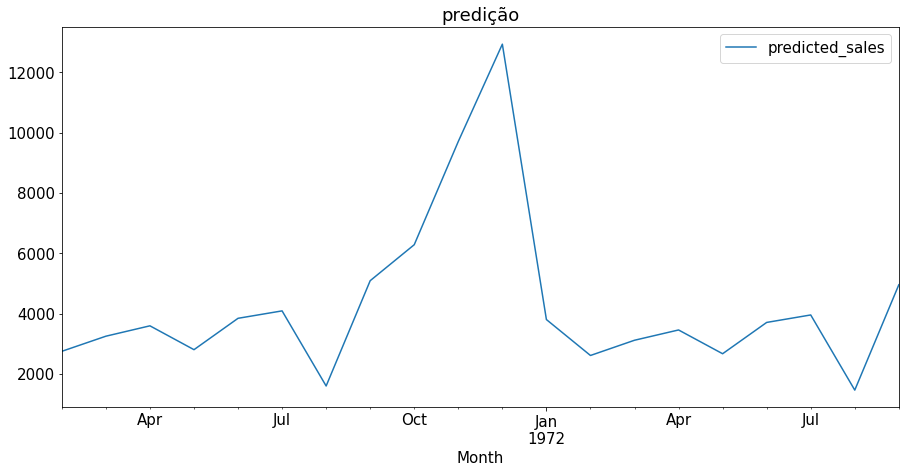

In [39]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_sales']
prediction.plot()
plt.title("predição");

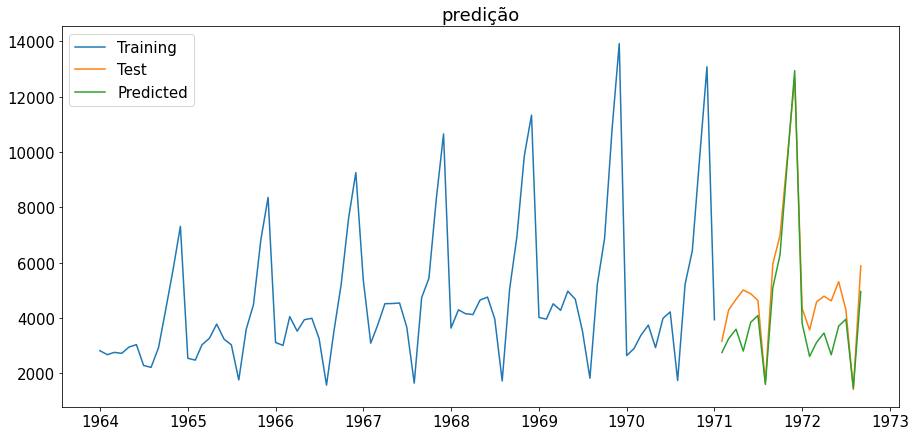

In [40]:
plt.figure()
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.title("predição")
plt.legend()
plt.show()

In [45]:
test['predicted_sales'] = prediction
r2_score(test['Champagne sales'], test['predicted_sales'])

0.8114760153263005